In [1]:
import cv2 as cv
import numpy as np
import pprint

## Changing Color-space

In [2]:
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
pprint.pprint(flags[:5])

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY']


In [6]:
cap = cv.VideoCapture('../images/parking_video.mp4')
while True:
    # take each frame 
    _, frame = cap.read()
    # convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower = np.array([50, 50, 50])
    upper = np.array([130, 255, 255])
    # Threshold the HSV image to get only blue color
    mask = cv.inRange(hsv, lower, upper)
    # bitwise-And mask and original image
    res = cv.bitwise_and(frame, frame, mask)
#     cv.imshow('frame', frame)
#     cv.imshow('mask', mask)
    cv.imshow('res', res)
    k = cv.waitKey(5) & 0xFF
    if k ==27:
        break
        
cv.destroyAllWindows()

## Find HSV values

In [7]:
green = np.uint8([[[0,255,0]]])
hsv_green = cv.cvtColor(green, cv.COLOR_BGR2HSV)
print(hsv_green)

[[[ 60 255 255]]]


In [8]:
red = np.uint8([[[0,0,255]]])
hsv_red = cv.cvtColor(red, cv.COLOR_BGR2HSV)
print(hsv_red)

[[[  0 255 255]]]


In [9]:
blue = np.uint8([[[255,0,0]]])
hsv_blue = cv.cvtColor(blue, cv.COLOR_BGR2HSV)
print(hsv_blue)

[[[120 255 255]]]


# Geometric Transformations of Images

### transformation

#### Scaling

In [10]:
img = cv.imread('../images/mm.jpg')

In [11]:
def cv_show(name, img):
    cv.imshow(name, img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [12]:
cv_show('MM', img)

In [13]:
img.shape

(422, 597, 3)

In [14]:
# 通过指定缩放比例fx，fy
res = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)
cv_show('res', res)

In [15]:
res.shape

(844, 1194, 3)

In [16]:
# 指定目标图像大小
h, w = img.shape[:2]
res1 = cv.resize(img, (2*w, 2*h), interpolation=cv.INTER_CUBIC)
res1.shape

(844, 1194, 3)

In [17]:
cv_show('res1', res)

#### translation 平移

$$M=
 \left[
 \begin{matrix}
   1 & 0 & t_x \\
   0 & 1 & t_y 
  \end{matrix}
  \right] \tag{B}
$$

$$
 \begin{align}
  dist(x, y) = src(M_{11}x + M_{12}y + M_{13}, M_{21}x + M_{22}y + M_{23})
  \end{align}
$$

In [18]:
img1 = cv.imread('../images/mm.jpg', 0)
cv_show('img1', img1)

In [19]:
h, w = img1.shape

In [20]:
M = np.float32([[1,0,100], [0,1,50]])

In [21]:
M

array([[  1.,   0., 100.],
       [  0.,   1.,  50.]], dtype=float32)

In [22]:
dst = cv.warpAffine(img, M, (w, h)) # M表示平移的位移，（w, h）表示平移后的图像尺寸
cv_show('dst', dst)

#### Rotation 旋转

$$M=
 \left[
 \begin{matrix}
   \alpha & \beta & (1-\alpha) \cdot center.x - \beta \cdot center.y \\
   -\beta & \alpha & \beta \cdot center.x - (1-\alpha) \cdot center.y 
  \end{matrix}
  \right] \tag{B}
$$

where       $$
\begin{align}
\alpha &= scale \cdot cos\theta \tag{3}\\
\beta &= scale \cdot sin\theta \tag{4}
\end{align}
$$

In [23]:
# 获取变换矩阵M
M = cv.getRotationMatrix2D(((w-1)/2.0, (h-1)/2.0), 90, 1) # theta=90, scale=1
# 放射变换 旋转
dst = cv.warpAffine(img1, M, (w, h))
dst.shape

(422, 597)

In [24]:
cv_show('dst', dst)

#### Affine Transformation

retval	=	cv.getAffineTransform(	src, dst	)
$$
\begin{bmatrix} x'_i \\ y'_i \end{bmatrix} = \texttt{map_matrix} \cdot \begin{bmatrix} x_i \\ y_i \\ 1 \end{bmatrix}
$$

where       $$
\begin{align}
dst(i)=(x'_i,y'_i), src(i)=(x_i, y_i), i=0,1,2
\end{align}
$$

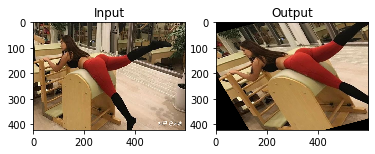

In [25]:
import matplotlib.pyplot as plt
mm = cv.imread('../images/mm.jpg')
img = cv.cvtColor(mm, cv.COLOR_BGR2RGB)
rows, cols, ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2) # pts1输入位置  pts2输出位置
dst = cv.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

#### Perspective Transformation 透视变换

$$\begin{bmatrix} t_i x'_i \\ t_i y'_i \\ t_i \end{bmatrix} = \texttt{map_matrix} \cdot \begin{bmatrix} x_i \\ y_i \\ 1 \end{bmatrix}$$

where
$$dst(i)=(x'_i,y'_i), src(i)=(x_i, y_i), i=0,1,2,3$$

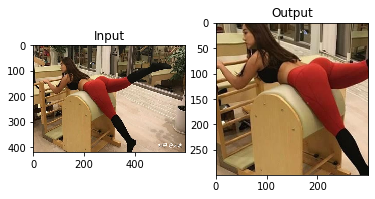

In [26]:
img = cv.imread('../images/mm.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# Image thresholding

## Simple thresholding

In [27]:
mm_gray = cv.imread('../images/mm.jpg', 0)
cv_show('gray', mm_gray)

In [28]:
ret, th1 = cv.threshold(mm_gray, 127, 255, cv.THRESH_BINARY)
cv_show('th1', th1)

In [29]:
# THRESH_BINARY: 超过阈值部分取maxval，否则取0
ret, th1 = cv.threshold(mm_gray, 127, 255, cv.THRESH_BINARY)
# THRESH_BINARY_INV: THRESH_BINARY的反转，超过阈值部分取0，否则取maxval
ret, th2 = cv.threshold(mm_gray, 127, 255, cv.THRESH_BINARY_INV)
# THRESH_TRUNC: 大于阈值部分设为阈值，否则不变
ret, th3 = cv.threshold(mm_gray, 127, 255, cv.THRESH_TRUNC)
# THRESH_TOZERO: 大于阈值部分不变，否则设为0
ret, th4 = cv.threshold(mm_gray, 127, 255, cv.THRESH_TOZERO)
# THRESH_TOZERO_INV: 大于阈值部分设为0， 否则不变
ret, th5 = cv.threshold(mm_gray, 127, 255, cv.THRESH_TOZERO_INV)

In [30]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [mm_gray, th1, th2, th3, th4, th5]

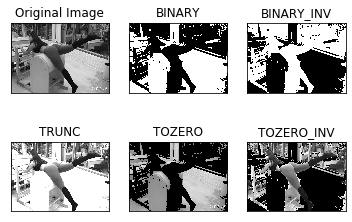

In [31]:
for i in range(6):
    plt.subplot(2,3, i+1),
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

## Adaptive thresholding

In [32]:
mm = cv.imread('../images/sudoku.png', 0)
mm = cv.medianBlur(mm, 5)
cv_show('mm', mm)

In [33]:
ret, th1 = cv.threshold(mm, 120, 255, cv.THRESH_BINARY)
# 阈值为bloksize（11）*blocksize(11)范围内的均值减去常量（2）
th2 = cv.adaptiveThreshold(mm, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
# 阈值为blocksize内的加权和减去常量c
th3 = cv.adaptiveThreshold(mm, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

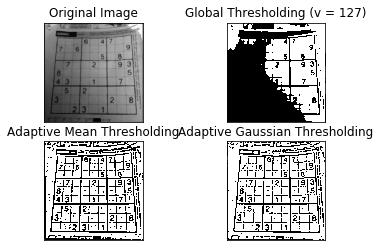

In [34]:
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [mm, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Otsu's Binarization

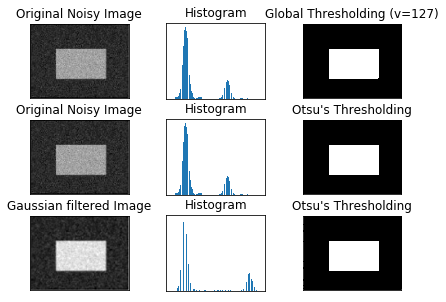

In [35]:
img = cv.imread('../images/noise.png',0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
# 自动调整子图的布局
plt.tight_layout(pad=0, h_pad=0, w_pad=0)
plt.show()

### Otsu's Binarization原理

$$\sigma_w^2(t) = q_1(t)\sigma_1^2(t)+q_2(t)\sigma_2^2(t)$$

where $$q_1(t) = \sum_{i=1}^{t} P(i) \quad \& \quad q_2(t) = \sum_{i=t+1}^{I} P(i)$$

$$\mu_1(t) = \sum_{i=1}^{t} \frac{iP(i)}{q_1(t)} \quad \& \quad \mu_2(t) = \sum_{i=t+1}^{I} \frac{iP(i)}{q_2(t)}$$

$$\sigma_1^2(t) = \sum_{i=1}^{t} [i-\mu_1(t)]^2 \frac{P(i)}{q_1(t)} \quad \& \quad \sigma_2^2(t) = \sum_{i=t+1}^{I} [i-\mu_2(t)]^2 \frac{P(i)}{q_2(t)}$$

In [36]:
img = cv.imread('noisy2.png',0)
blur = cv.GaussianBlur(img,(5,5),0)
# find normalized_histogram, and its cumulative distribution function
hist = cv.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.sum()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    if q1 < 1.e-6 or q2 < 1.e-6:
        continue
    b1,b2 = np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
# find otsu's threshold value with OpenCV function
ret, otsu = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print( "{} {}".format(thresh,ret) )

error: OpenCV(4.2.0) /io/opencv/modules/core/src/matrix.cpp:757: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'locateROI'
